# Question NINE

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [98]:
df = pd.read_csv("A3_P1_7b27d5cc-755e-4f78-bab1-6c2373544adc.csv")
df_array = df.values
df_array

array([[-7.94574606,  7.60824619],
       [-6.18281759, -5.57587537],
       [ 2.91352697, -2.14414576],
       ...,
       [ 1.04183296,  6.22288973],
       [-6.72804961, -5.78274531],
       [-8.92912104,  1.39239512]])

In [99]:
inertia_values = []
for k in range(1, 16):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
    kmeans.fit(df_array)
    inertia = kmeans.inertia_
    inertia_values.append(inertia) 

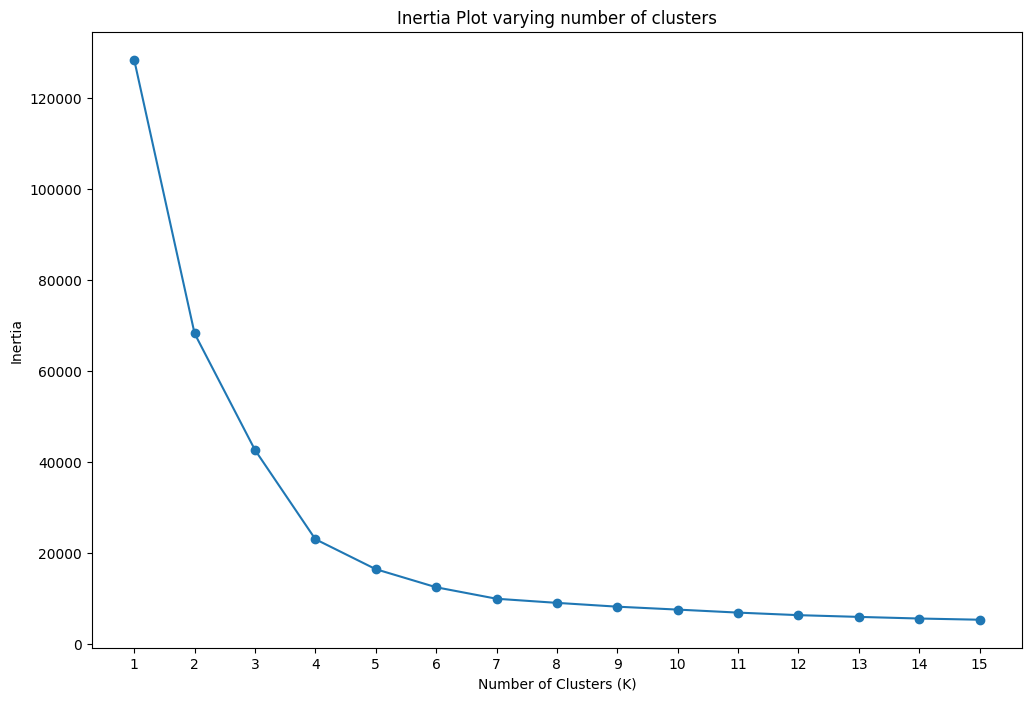

In [100]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 16), inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Inertia Plot varying number of clusters')
plt.xticks(range(1, 16))
plt.show()

In [101]:

def show_clusters(optimal_clusters) :
    kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', n_init=10, max_iter=300, random_state=42)

    df['Cluster'] = kmeans.fit_predict(df_array)
    # here fit_predict function from the kmeans takes the input vector and returns another vector of same length
    # the returned vector contains all the labels of the cluster to which the current value belongs to

    centroids = kmeans.cluster_centers_
    # this will contain the coordinates (feature 1 and 2 values average of the cluster members)

    plt.figure(figsize=(8, 5))
    for cluster in range(optimal_clusters):
        cluster_data = df[df['Cluster'] == cluster]
        plt.scatter(cluster_data['Feature_1'], cluster_data['Feature_2'], label=f'Cluster {cluster+1}')

    
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='black', edgecolor='white', label='Centroids')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('K-Means Clustering')
    plt.legend()
    plt.show()

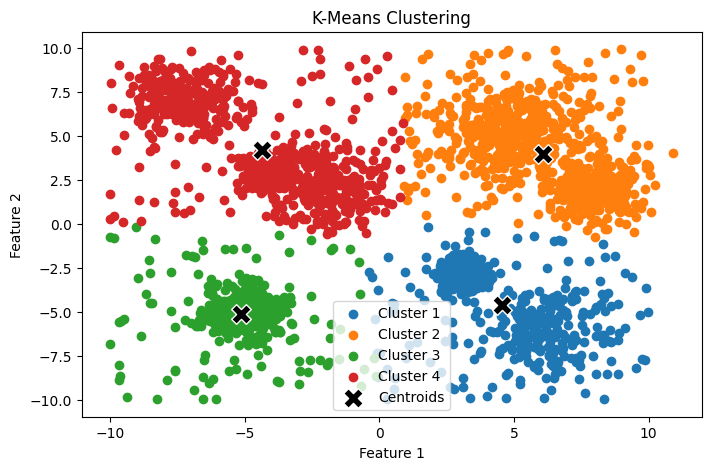

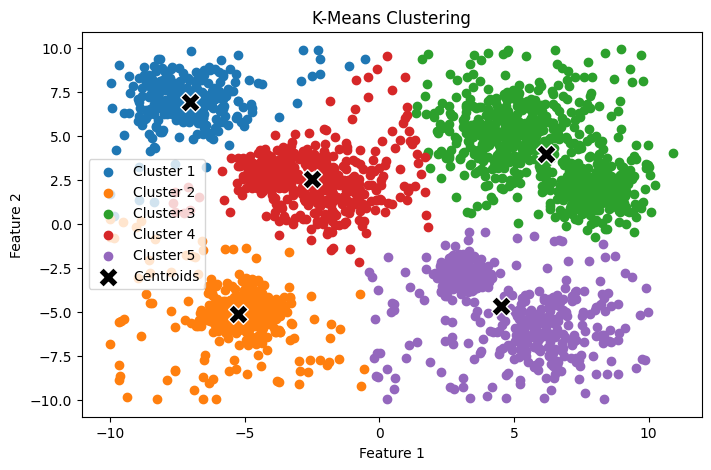

In [102]:
# from the figure, using the elbow method, the best and optimal number of clusters is 4 OR 5 

# for 4 clusters
show_clusters(4)

# for 5 clusters
show_clusters(5)


# Question TEN

In [103]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

In [104]:
df = pd.read_csv("A3_P2_170cd1d8-a072-4f67-ba36-10f26f772880.csv")
df["Feature_1"] = df["Feature_1"].astype(float)

In [105]:
def dist(x, y):
    return abs(x - y)


def cluster_distance(cluster_a, cluster_b, metric):
   
    a_values = cluster_a["Feature_1"].values
    b_values = cluster_b["Feature_1"].values
    distances = []

    for a in a_values:
        for b in b_values:
            distances.append(dist(a, b))

    if metric == "single":
        return min(distances)
    elif metric == "average":
        return sum(distances) / len(distances)
    elif metric == "complete":
        return max(distances)


In [106]:
def hierarchical_clustering(data, linkage):

    n = len(data)

    clusters = [] #(cluster_id, set_of_indices) for every cluster
    for i in range(n) :
        clusters.append((i, {i}))


    history = [] #To store merge history
    next_id = n


    while len(clusters) > 1:
        min_distance = float(1e9)
        merge_pair = (None, None)

        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):

                id1, cluster1 = clusters[i]
                id2, cluster2 = clusters[j]
                d = cluster_distance(data.iloc[list(cluster1)], data.iloc[list(cluster2)], linkage)
                if d < min_distance:
                    min_distance = d
                    merge_pair = (i, j)


        if merge_pair[0] is None:
            break

        i, j = merge_pair
        id1, cluster1 = clusters[i]
        id2, cluster2 = clusters[j]
        new_cluster = cluster1.union(cluster2)

        history.append((id1, id2, min_distance, len(new_cluster)))

        # remove old ones
        if i < j:
            clusters.pop(j)
            clusters.pop(i)
        else:
            clusters.pop(i)
            clusters.pop(j)
        clusters.append((next_id, new_cluster))
        next_id += 1

    return history


In [107]:
def plot_dendrogram(history, title):
    linkage_matrix = np.array(history)
    plt.figure(figsize=(10, 5))
    dendrogram(linkage_matrix)
    plt.title(title)
    plt.xlabel("Data Points")
    plt.ylabel("Distance")
    plt.show()

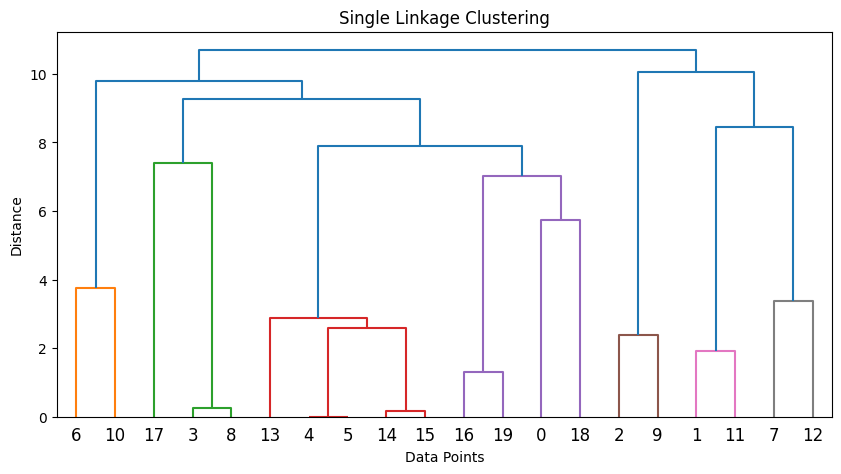

In [108]:
single_history = hierarchical_clustering(df, "single")
plot_dendrogram(single_history, "Single Linkage Clustering")

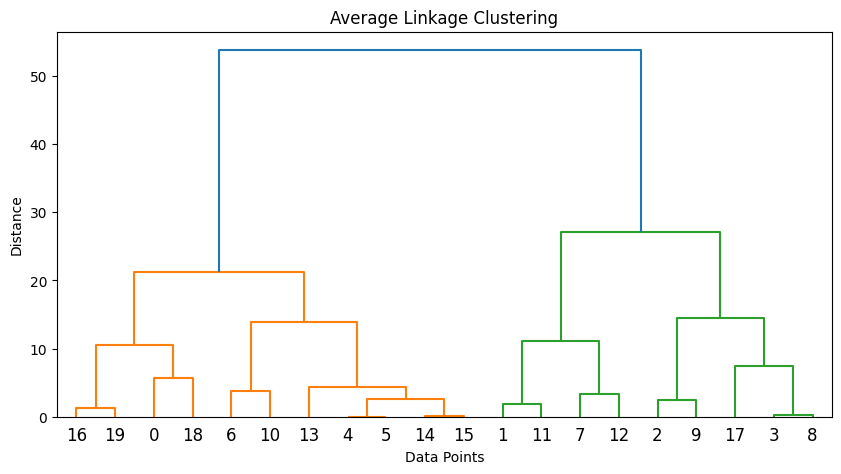

In [109]:
average_history = hierarchical_clustering(df, "average")
plot_dendrogram(average_history, "Average Linkage Clustering")

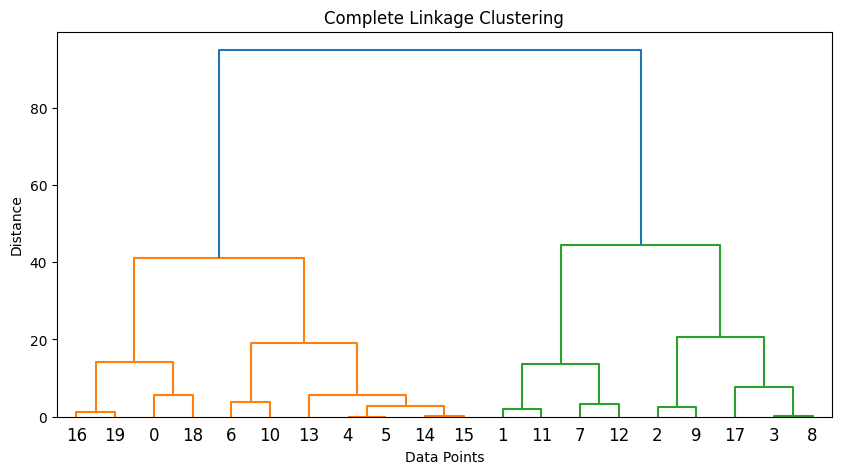

In [110]:
complete_history = hierarchical_clustering(df, "complete")
plot_dendrogram(complete_history, "Complete Linkage Clustering")